# Clasificación de enfermedades en cultivos de papa
### Proyecto Final AREP
Angie Natalia Mojica - Daniel Antonio Santanilla

In [ ]:
!pip install kaggle

In [ ]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

## Funciones auxiliares

In [ ]:
def extract_zip_file(zip_file, dir_destino):
    """
    Extrae el contenido de un archivo ZIP en un directorio especificado.

    Args:
        zip_file (str): La ruta al archivo ZIP que se va a extraer.
        dir_destino (str): La ruta del directorio donde se extraerán los archivos.
    """

    try:
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(dir_destino)
        print(f"✅ Archivo ZIP '{zip_file}' extraído exitosamente en '{dir_destino}'")
    except FileNotFoundError:
        print(f"❌ Error: El archivo ZIP '{zip_file}' no se encuentra.")
    except zipfile.BadZipFile:
        print(f"❌ Error: El archivo '{zip_file}' está dañado o no es un archivo ZIP válido.")
    except PermissionError:
        print(f"❌ Error: No tienes permisos para escribir en el directorio '{dir_destino}'.")
    except Exception as e:
        print(f"❌ Error inesperado: {e}")


In [ ]:
def delete_folders_not_in_list(root_folder, allowed_folders):
    """
    Elimina las carpetas dentro de una carpeta raíz que no estén en una lista permitida.

    Args:
        root_folder (str): Ruta de la carpeta raíz.
        allowed_folders (list): Lista de nombres de carpetas permitidas.
    """
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path) and folder_name not in allowed_folders:
            try:
                shutil.rmtree(folder_path)
                print(f"✅ Carpeta '{folder_name}' eliminada.")
            except Exception as e:
                print(f"❌ Error al eliminar la carpeta '{folder_name}': {e}")

In [ ]:
def get_image_paths(folder_path):
    """
    Obtiene una lista de rutas completas de imágenes en un directorio.

    Args:
        folder_path (str): Ruta del directorio que contiene las imágenes.

    Returns:
        list: Lista de rutas completas de las imágenes.
    """
    return [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]


In [ ]:
def show_image_examples(image_paths, title, num_examples=5):
    """
    Muestra ejemplos de imágenes de una lista de rutas.

    Args:
        image_paths (list): Lista de rutas de imágenes.
        title (str): Título para la figura.
        num_examples (int): Número de ejemplos a mostrar (por defecto, 5).
    """

    fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
    fig.suptitle(title)
    for i, image_path in enumerate(image_paths[:num_examples]):
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

In [ ]:
def count_images_per_class(data_dir):
    """
    Cuenta el número de imágenes por clase en un directorio de datos.

    Args:
        data_dir (str): Ruta del directorio que contiene las clases de imágenes.

    Returns:
        pd.Series: Serie de Pandas con los nombres de las clases y sus respectivos conteos.
    """
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(get_image_paths(class_dir))
    return pd.Series(class_counts)

## Descargar Datasets

In [ ]:
# API KAGGLE
os.environ['KAGGLE_USERNAME'] = 'elx4nta'
os.environ['KAGGLE_KEY'] = 'your_api_key'

In [ ]:
!kaggle datasets download -d nirmalsankalana/potato-leaf-disease-dataset -p rawdata/
!kaggle datasets download -d mohitsingh1804/plantvillage -p rawdata/
!kaggle datasets download -d rizwan123456789/potato-disease-leaf-datasetpld -p rawdata/
!kaggle datasets download -d nirmalsankalana/potato-leaf-healthy-and-late-blight -p rawdata/

### Unificación de datasets

In [ ]:
extract_zip_file('rawdata/plantvillage.zip', 'rawdata/')
extract_zip_file('rawdata/potato-disease-leaf-datasetpld.zip', 'rawdata/')
extract_zip_file('rawdata/potato-leaf-disease-dataset.zip', 'rawdata/')
extract_zip_file('rawdata/potato-leaf-healthy-and-late-blight.zip', 'rawdata/')

✅ Archivo ZIP 'rawdata/plantvillage.zip' extraído exitosamente en 'rawdata/'
✅ Archivo ZIP 'rawdata/potato-disease-leaf-datasetpld.zip' extraído exitosamente en 'rawdata/'
✅ Archivo ZIP 'rawdata/potato-leaf-disease-dataset.zip' extraído exitosamente en 'rawdata/'
✅ Archivo ZIP 'rawdata/potato-leaf-healthy-and-late-blight.zip' extraído exitosamente en 'rawdata/'


In [ ]:
!rm -r -f rawdata/Fungi/
!rm -r -f rawdata/Nematode/
!rm -r -f rawdata/Pest/
!rm -r -f rawdata/Phytopthora/

In [ ]:
!mkdir rawdata/Early_Blight/

In [ ]:
!mv rawdata/PLD_3_Classes_256/Testing/Early_Blight/* rawdata/Early_Blight/
!mv rawdata/PLD_3_Classes_256/Validation/Early_Blight/* rawdata/Early_Blight/
!mv rawdata/PLD_3_Classes_256/Training/Early_Blight/* rawdata/Early_Blight/

!mv rawdata/PLD_3_Classes_256/Testing/Healthy/* rawdata/Healthy/
!mv rawdata/PLD_3_Classes_256/Validation/Healthy/* rawdata/Healthy/
!mv rawdata/PLD_3_Classes_256/Training/Healthy/* rawdata/Healthy/

!mv rawdata/PLD_3_Classes_256/Testing/Late_Blight/* rawdata/Late_Blight/
!mv rawdata/PLD_3_Classes_256/Validation/Late_Blight/* rawdata/Late_Blight/
!mv rawdata/PLD_3_Classes_256/Training/Late_Blight/* rawdata/Late_Blight/

!mv rawdata/PlantVillage/train/Potato___Early_blight/* rawdata/Early_Blight/
!mv rawdata/PlantVillage/train/Potato___Late_blight/* rawdata/Late_Blight/
!mv rawdata/PlantVillage/train/Potato___healthy/* rawdata/Healthy/

!mv rawdata/PlantVillage/val/Potato___Early_blight/* rawdata/Early_Blight/
!mv rawdata/PlantVillage/val/Potato___Late_blight/* rawdata/Late_Blight/
!mv rawdata/PlantVillage/val/Potato___healthy/* rawdata/Healthy/

mv: target 'rawdata/Late_Blight/' is not a directory
mv: target 'rawdata/Late_Blight/' is not a directory
mv: target 'rawdata/Late_Blight/' is not a directory
mv: target 'rawdata/Late_Blight/' is not a directory
mv: target 'rawdata/Late_Blight/' is not a directory


In [ ]:
!rm -r -f rawdata/PlantVillage/
!rm -r -f rawdata/PLD_3_Classes_256/

Se ajustan los nombres de las enfermedades a clasificar

In [ ]:
potatoe_map = {
    'Bacteria': 'Pudricion_Parda',
    'Healthy': 'Sana',
    'Late_Blight': 'Tizon_Tardio',
    'Early_Blight': 'Tizon_Temprano',
    'Virus': 'Virus'
}

## Análisis de datos

In [ ]:
# Directorio base de datos
data_dir = 'rawdata/'

# Renombrar carpetas
for folder_name in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, folder_name)):
        new_folder_name = potatoe_map.get(folder_name, folder_name)
        os.rename(os.path.join(data_dir, folder_name), os.path.join(data_dir, new_folder_name))


In [ ]:
!rm -r -f rawdata/.ipynb_checkpoints/

### Mostrando ejemplares

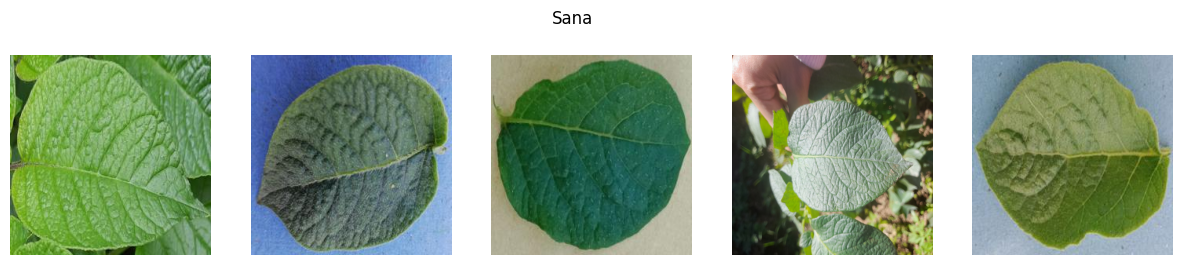

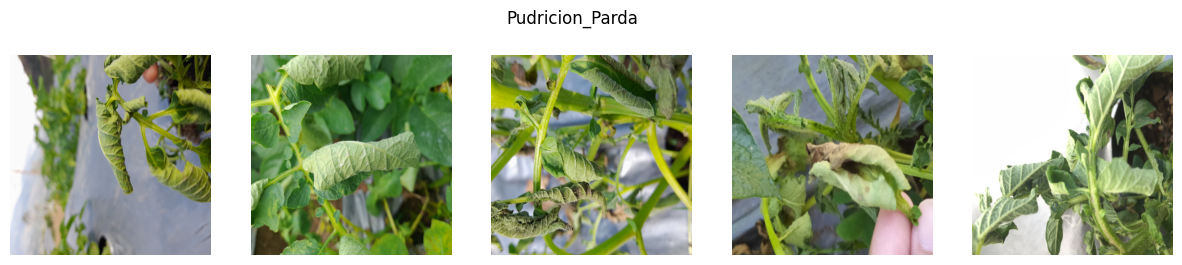

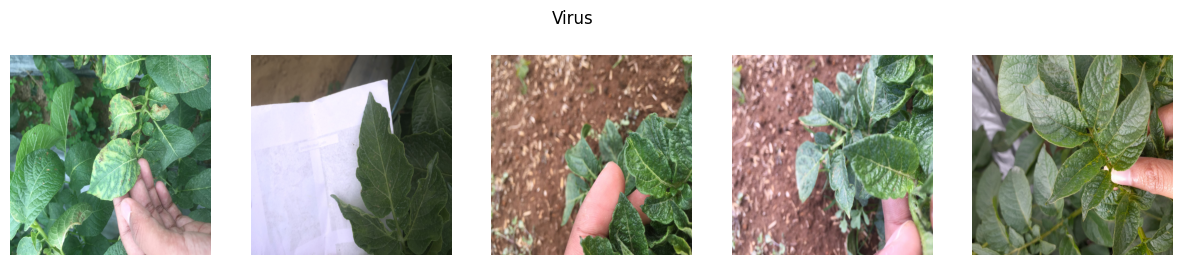

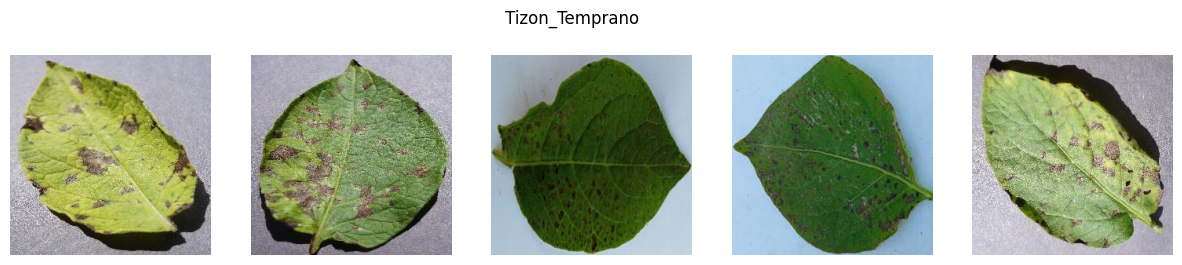

In [ ]:
# Obtener nombres de las clases
class_names = os.listdir(data_dir)

# Mostrar ejemplos de cada clase
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_paths = get_image_paths(class_dir)
    show_image_examples(image_paths, class_name)

### Mostrando distribución de datos

In [ ]:
# Contar imágenes por clase
class_counts = count_images_per_class(data_dir)

# Visualizar la distribución de clases con Seaborn y paleta predefinida
sns.set_theme(style="white", palette="hls")
ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

## Balanceo de datos

In [ ]:
import cv2
import albumentations as A
import numpy as np

# Directorios de datos
data_dir = 'rawdata/'
aug_dir = 'augmenteddata/'

# Número de imágenes objetivo por clase
target_images_per_class = 2350

In [ ]:
def augment_and_save_images(image_paths, class_name, aug_dir, target_count, transform):
    """Aplica aumento de datos y guarda las imágenes aumentadas."""
    augmented_images = 0
    while augmented_images < target_count - len(image_paths):
        for image_path in image_paths:
            image = cv2.imread(image_path)
            augmented_image = transform(image=image)['image']
            augmented_path = os.path.join(aug_dir, class_name, f'{os.path.splitext(os.path.basename(image_path))[0]}_{augmented_images}.jpg')
            cv2.imwrite(augmented_path, augmented_image)
            augmented_images += 1
            if augmented_images >= target_count - len(image_paths):
                break

In [ ]:
# Crear el directorio de salida si no existe
os.makedirs(aug_dir, exist_ok=True)

# Definir transformaciones de aumento de datos
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

# Realizar aumento de datos por clase
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    os.makedirs(os.path.join(aug_dir, class_name), exist_ok=True)
    image_paths = get_image_paths(class_dir)
    augment_and_save_images(image_paths, class_name, aug_dir, target_images_per_class, transform)


### Resultados y muestra de las imagenes creadas

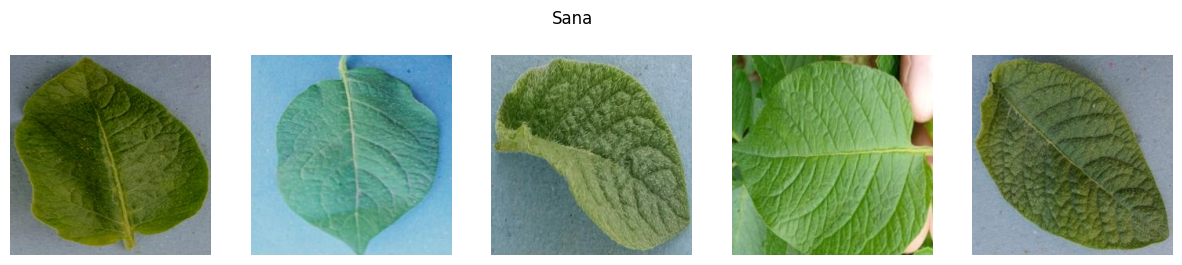

In [ ]:
# Mostrar ejemplos de imágenes aumentadas
class_names_aug = os.listdir(aug_dir)

# Mostrar ejemplos de cada clase
for class_name in class_names_aug:
    class_dir = os.path.join(aug_dir, class_name)
    image_paths = get_image_paths(class_dir)
    show_image_examples(image_paths, class_name)

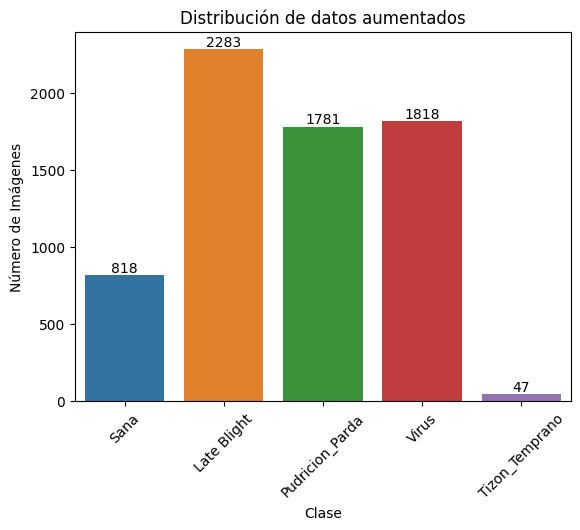

In [ ]:
# Contar imágenes por clase después del aumento
aug_class_counts = count_images_per_class(aug_dir)

ax = sns.barplot(x=aug_class_counts.index, y=aug_class_counts.values, hue=aug_class_counts.index)
plt.title('Distribución de datos aumentados')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

### Unificación de dataset a utilizar

In [ ]:
import shutil
import random
from collections import Counter

# Directorios
data_dir = 'rawdata/'
aug_dir = 'augmenteddata/'
dataset_dir = 'dataset/'

# Crear el directorio de salida si no existe
os.makedirs(dataset_dir, exist_ok=True)

# Obtener todas las clases
class_names = set(os.listdir(data_dir)) | set(os.listdir(aug_dir))

# Combinar y limitar imágenes por clase
for class_name in class_names:
    class_data_dir = os.path.join(data_dir, class_name)
    class_aug_dir = os.path.join(aug_dir, class_name)
    os.makedirs(os.path.join(dataset_dir, class_name), exist_ok=True)

    image_paths = []
    if os.path.exists(class_data_dir):
        image_paths.extend(get_image_paths(class_data_dir))
    if os.path.exists(class_aug_dir):
        image_paths.extend(get_image_paths(class_aug_dir))

    random.shuffle(image_paths)  # Mezclar las imágenes
    image_paths = image_paths[:target_images_per_class]  # Limitar a 1600

    for image_path in image_paths:
        shutil.copy(image_path, os.path.join(dataset_dir, class_name))

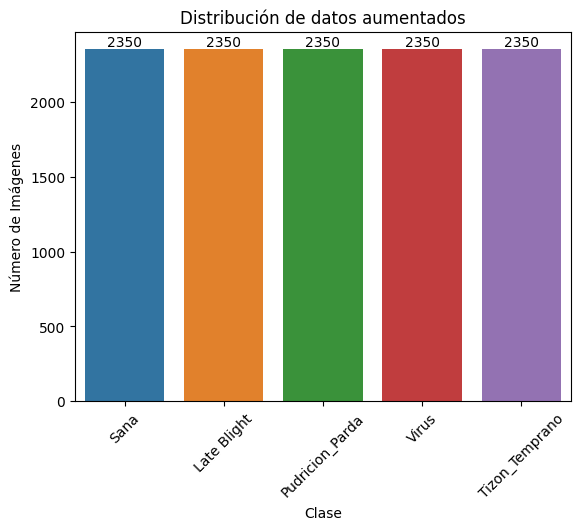

In [ ]:
aug_class_counts = count_images_per_class(dataset_dir)

ax = sns.barplot(x=aug_class_counts.index, y=aug_class_counts.values, hue=aug_class_counts.index)
plt.title('Distribución de datos aumentados')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

# Subiendo el dataset a HugginFace

In [ ]:
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        image_count = 1
        for filename in os.listdir(class_dir):
            if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG')):  # Asegúrate de incluir los formatos que necesitas
                old_path = os.path.join(class_dir, filename)
                new_filename = f"{class_name}_{image_count}.jpg"  # Puedes cambiar la extensión si es necesario
                new_path = os.path.join(class_dir, new_filename)
                os.rename(old_path, new_path)
                image_count += 1

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset, DatasetDict

# Cargar las imágenes en un DatasetDict
dataset = load_dataset("imagefolder", data_dir=dataset_dir)

Resolving data files:   0%|          | 0/11750 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

## Preprocesamiento

### División de dataset

In [ ]:
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

In [ ]:
# Dividir en entrenamiento y validación
dataset_test_val = dataset["train"].train_test_split(test_size=int((val_ratio+test_ratio)*11750))

# Renombrar el conjunto de prueba a "validation"
dataset = DatasetDict({
    "train": dataset_test_val["train"],
    "validation": dataset_test_val["test"]
})


In [ ]:
dataset_val_test = dataset["validation"].train_test_split(test_size=int((1/3)*3525))

dataset = DatasetDict({
    "train": dataset_test_val["train"],
    "validation": dataset_val_test["train"],
    "test": dataset_val_test["test"]
})

### Iniciando sesión en Hugging Face para subir dataset

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
dataset.push_to_hub("ELS4NTA/enfermedades_hoja_papa")

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/2057 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/21 [00:00<?, ?ba/s]

Map:   0%|          | 0/2056 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/21 [00:00<?, ?ba/s]

Map:   0%|          | 0/2056 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/21 [00:00<?, ?ba/s]

Map:   0%|          | 0/2056 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/21 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2350 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1175 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ELS4NTA/enfermedades_hoja_papa/commit/57d0ec7b8891fd35ddc65e3882d0e58d6749a580', commit_message='Upload dataset', commit_description='', oid='57d0ec7b8891fd35ddc65e3882d0e58d6749a580', pr_url=None, pr_revision=None, pr_num=None)

### Visualizando los conjuntos de datos para entrenamiento, validación y prueba

<ipython-input-65-f093b4cee65c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=dataset['train']['label'], palette="hls")


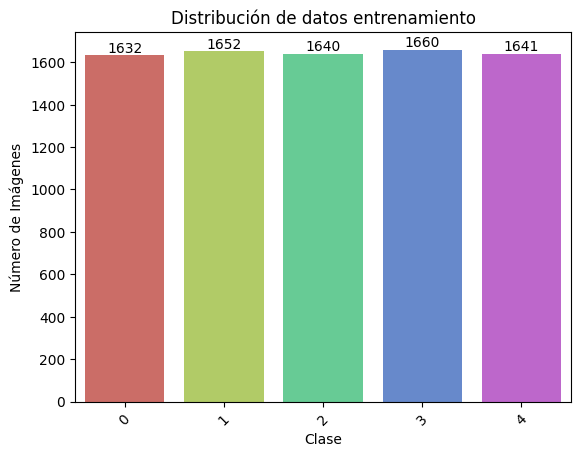

In [ ]:
ax = sns.countplot(x=dataset['train']['label'], palette="hls")
plt.title('Distribución de datos entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

<ipython-input-70-e1ef9719af57>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=dataset['validation']['label'], palette="hls")


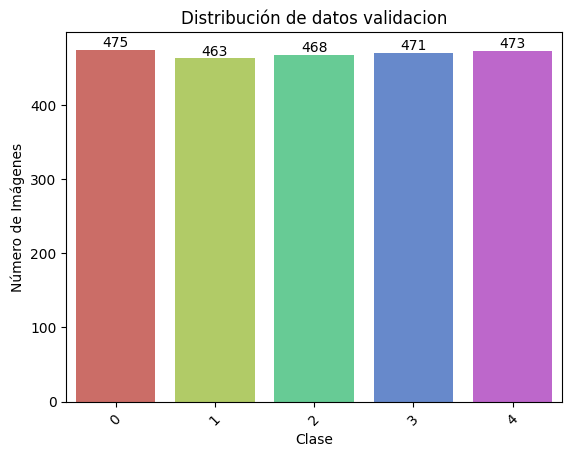

In [ ]:
ax = sns.countplot(x=dataset['validation']['label'], palette="hls")
plt.title('Distribución de datos validacion')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

<ipython-input-68-ee52902f7c05>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=dataset['test']['label'], palette="hls")


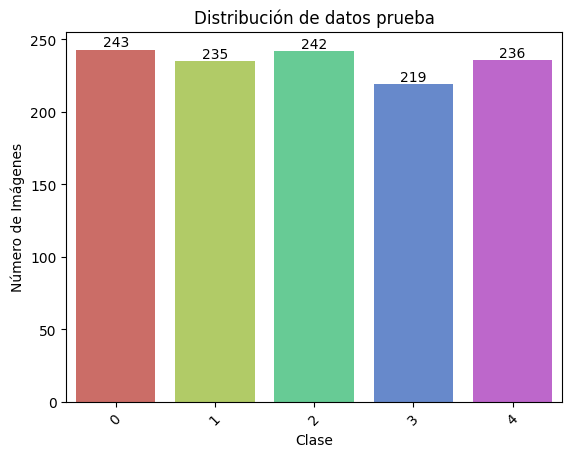

In [ ]:
ax = sns.countplot(x=dataset['test']['label'], palette="hls")
plt.title('Distribución de datos prueba')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()